In [1]:
import pymc3 as pm

from bayesumis.umis_math_model import UmisMathModel
from bayesumis.umis_diagram import UmisDiagram
from stafdb.staf_factory import StafFactory
from testhelper.posterior_plotters import display_parameters

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
def make_stafids_from_ranges(ranges):
    stafids = []
    for (l, u) in ranges:
        str_range = [str(x) for x in range(l, u+1)]
        stafids = stafids + str_range
    return stafids

In [3]:
staf_factory = StafFactory('csvs_zinc_cycle_graedal_2005')

# stafs [1-2] are external inflows
# stafs [3-8, 11-16, 18-22] are internal stafs
# stafs [9-10, 17] are external outflows
external_inflow_stafids = make_stafids_from_ranges([(1,2)])
internal_stafs_stafids = make_stafids_from_ranges([(3,8), (11,16), (18,22)])
external_outflow_stafids = make_stafids_from_ranges([(9,10), (17,17)])


In [4]:
external_inflows = staf_factory.build_stafs(external_inflow_stafids)
internal_stafs = staf_factory.build_stafs(internal_stafs_stafids)
external_outflows = staf_factory.build_stafs(external_outflow_stafids)

ref_material = staf_factory.build_material('1')
ref_timeframe = staf_factory.build_timeframe('1')

In [5]:
umis_diagram = UmisDiagram(
    external_inflows,
    internal_stafs,
    external_outflows
)

In [6]:
res_inflows = umis_diagram.get_external_inflows()
res_dict = umis_diagram.get_process_stafs_dict()
res_outflows = umis_diagram.get_external_outflows()

In [7]:
print("Inflows")
for x in res_inflows:
    print(x)
    
print()
print()

print("Internal Stafs")
for key, values in res_dict.items():
    print(key)
    for val in values.flows:
        print(val)
    print()
    if values.stock is not None:
        print(values.stock)
    print("----------------")
    
print()
print()

print("Outflows")
for x in res_outflows:
    print(x)

Inflows
Staf: Imported Refined Zinc, ID: 2
Staf: Concentrate, ID: 1


Internal Stafs
Process: Production: Mill, Smelter, Refinery – Transformation, STAFDB ID: 2
Staf: Distributed Production, ID: 3

----------------
Process: Production: Mill, Smelter, Refinery – Distribution, STAFDB ID: 3
Staf: Production Refined Zinc, ID: 5
Staf: Production Mass Balance, ID: 4
Staf: Slag, ID: 6

----------------
Process: Production: Mass balance, STAFDB ID: 5

----------------
Process: Fabrication and Manufacturing – Transformation, STAFDB ID: 6
Staf: Distributed Fabrication and Manufacturing, ID: 8

----------------
Process: Environment, STAFDB ID: 14

Staf: Dissipation to Environment, ID: 22
----------------
Process: Production: Mill, Smelter, Refinery – Stock, STAFDB ID: 4

Staf: Production Stock, ID: 7
----------------
Process: Fabrication and Manufacturing – Distribution, STAFDB ID: 7
Staf: Products, ID: 11
Staf: Fabrication and Manufacturing Discards, ID: 12

----------------
Process: Use – Trans

In [8]:
math_model = UmisMathModel(
    res_inflows,
    res_dict,
    res_outflows,
    ref_material,
    ref_timeframe)

/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional in

Process with id: 5_2, has no outflows


/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


Process with id: 13_2, has no outflows


In [9]:
sample_size = 3000

with math_model.pm_model:
    trace = pm.sample(sample_size, init='advi')


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
  0%|          | 0/200000 [00:00<?, ?it/s]/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Average Loss = 65.033:   9%|▊         | 17260/200000 [00:40<07:11

In [10]:
map_estimate = pm.find_MAP(model=math_model.pm_model)

/home/tom/.local/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; 

Estimates of: External Inflows

Input Flow: Concentrate: 120.00990263173043
Input Flow: Imported Refined Zinc: 110.56353196792911


Estimates of: Internal Stafs

TC: Imported Refined Zinc: 1.0
Internal Staf: Distributed Production: 131.00999638769426
Internal Staf: Production Mass Balance: 15.442634079341266
Internal Staf: Production Refined Zinc: 110.56736090504118
Internal Staf: Slag: 5.000001403311802
Internal Staf: Production Stock: 5.000097935039806
Internal Staf: Distributed Fabrication and Manufacturing: 243.15365421744178
Internal Staf: Products: 171.284505988954
Internal Staf: Fabrication and Manufacturing Discards: 48.88690231969891
Internal Staf: Distributed Use: 128.4536425139991
Internal Staf: Use stock: 42.830863474954924
Internal Staf: Use Discards: 128.4536425139991
Internal Staf: Waste Management Distribution: 177.34054483369803
Internal Staf: Landfilled Waste, Dissipated: 67.99941788618636
Internal Staf: Zinc Scrap Fabrication: 22.022761344471494
Internal Staf: Zinc S

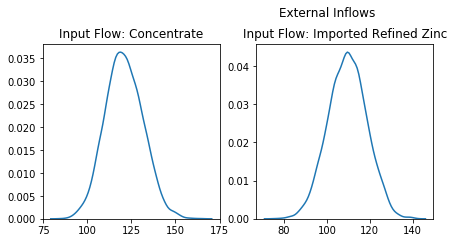

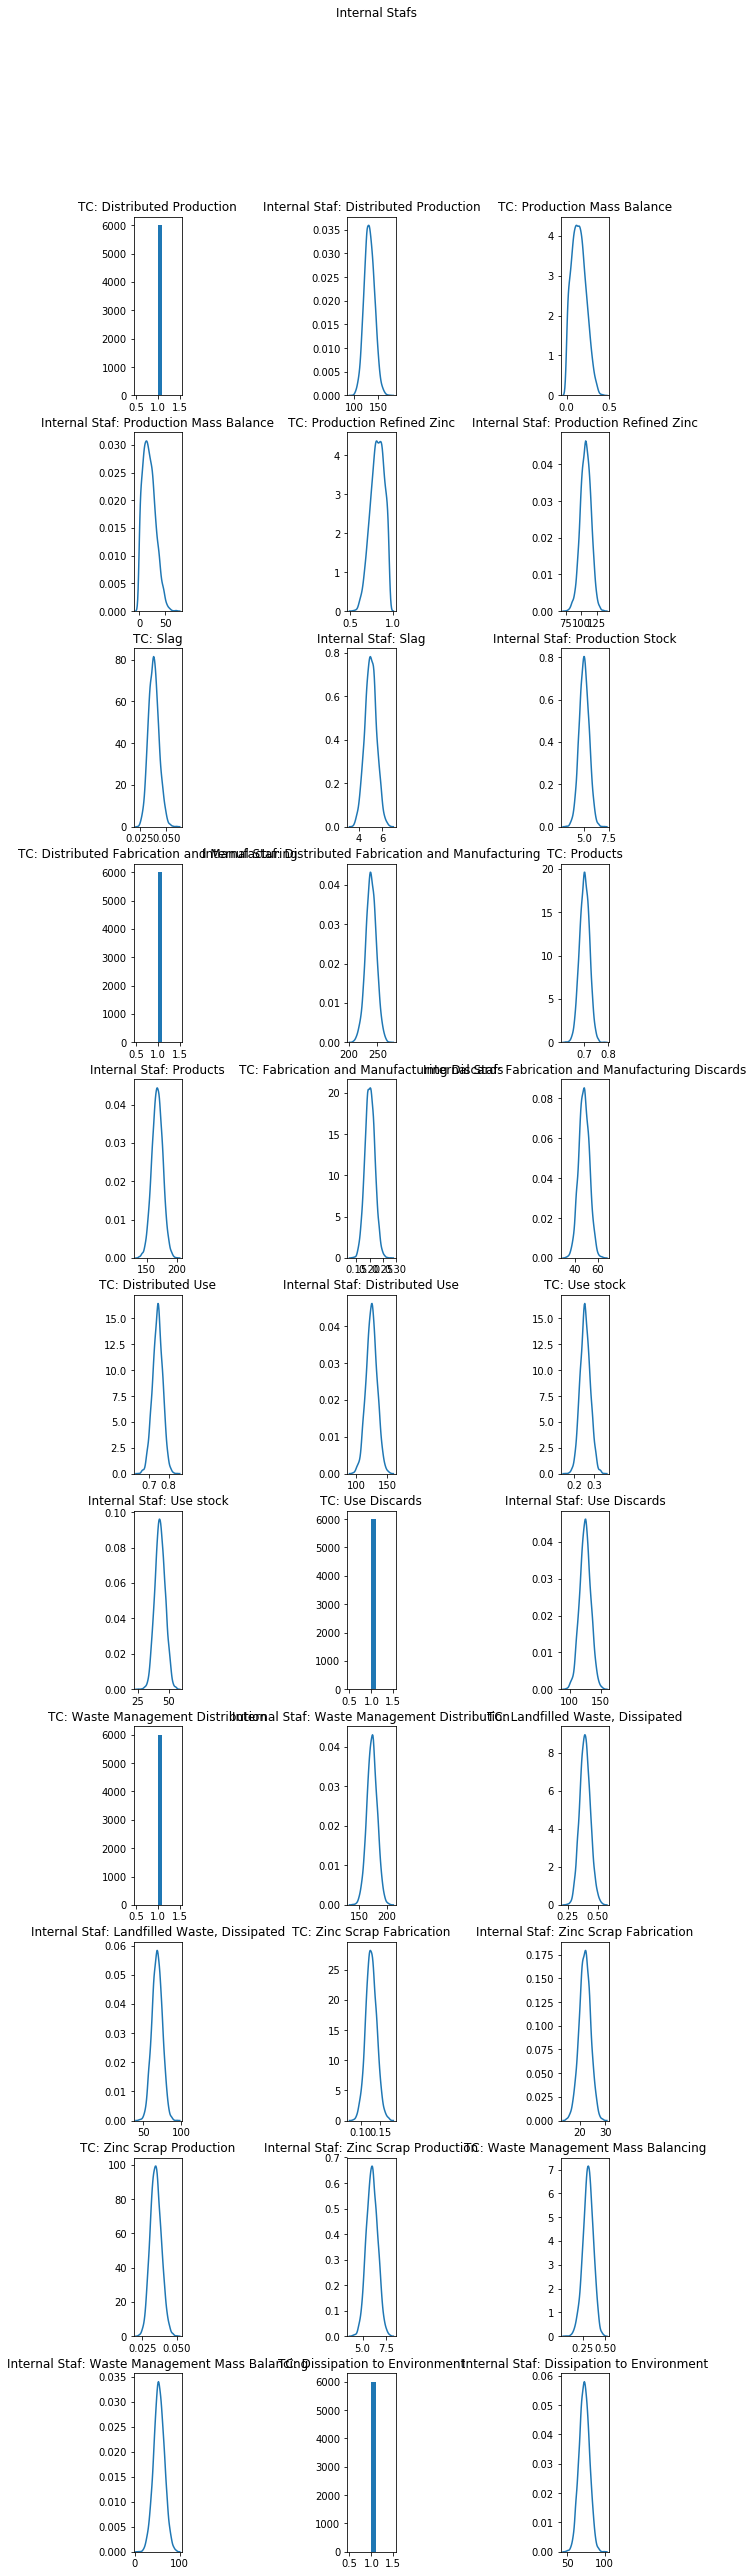

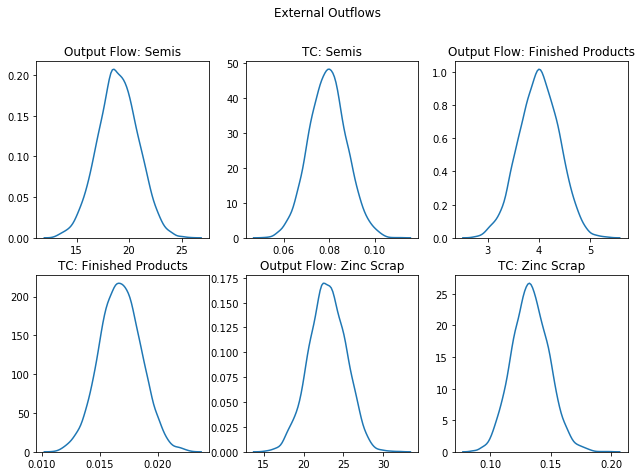

In [30]:
display_parameters(external_inflows, internal_stafs, external_outflows, trace, map_estimate, math_model)